In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
to = pd.read_csv("../input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv")
to.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3


In [3]:
to.shape

(93, 6)

In [4]:
to.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


In [5]:
to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        93 non-null     object
 1   Gold Medal     93 non-null     int64 
 2   Silver Medal   93 non-null     int64 
 3   Bronze Medal   93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank By Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.5+ KB


In [6]:
to.columns

Index(['Country', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total',
       'Rank By Total'],
      dtype='object')

## Leading Countries

In [7]:
leading = to.sort_values("Rank By Total", ascending = True)
leading

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
2,Japan,27,14,17,58,5
...,...,...,...,...,...,...
76,Bahrain,0,1,0,1,77
62,Bermuda,1,0,0,1,77
63,Morocco,1,0,0,1,77
81,Turkmenistan,0,1,0,1,77


In [8]:
## Gold medals 
gold_leading = to.sort_values("Gold Medal", ascending = False)
gold_leading

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
...,...,...,...,...,...,...
68,Armenia,0,2,2,4,47
67,Dominican Republic,0,3,2,5,42
66,Azerbaijan,0,3,4,7,33
65,Colombia,0,4,1,5,42


In [9]:
## Silver medals
silver_leading = to.sort_values("Silver Medal", ascending = False)
silver_leading

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
2,Japan,27,14,17,58,5
...,...,...,...,...,...,...
41,Bahamas,2,0,0,2,66
40,Qatar,2,0,1,3,60
39,Israel,2,0,2,4,47
38,Ireland,2,0,2,4,47


In [10]:
bronze_leading = to.sort_values("Bronze Medal", ascending = False)
bronze_leading

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
5,Australia,17,7,22,46,6
9,Italy,10,10,20,40,7
...,...,...,...,...,...,...
76,Bahrain,0,1,0,1,77
51,South Africa,1,2,0,3,60
57,Tunisia,1,1,0,2,66
62,Bermuda,1,0,0,1,77


USA is leading in all categories

In [11]:
## Find Kenya 
to.loc[to.Country=="Kenya"]

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
18,Kenya,4,4,2,10,25


Alternatively

In [12]:
kenya=to.query('Country=="Kenya"')
kenya

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
18,Kenya,4,4,2,10,25


In [13]:
More_than_45_medals=to.query('Total>=45')
More_than_45_medals

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6


In [14]:
plt.style.use("ggplot")

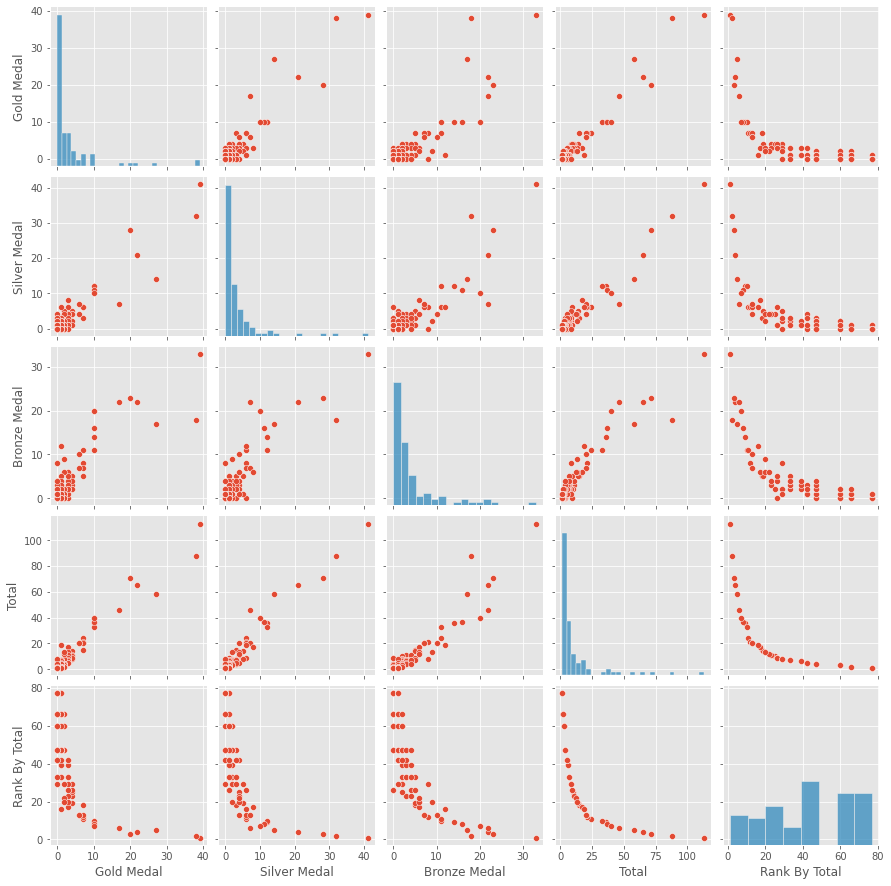

In [15]:
sns.pairplot(to);

In [16]:
plt.style.use("ggplot")

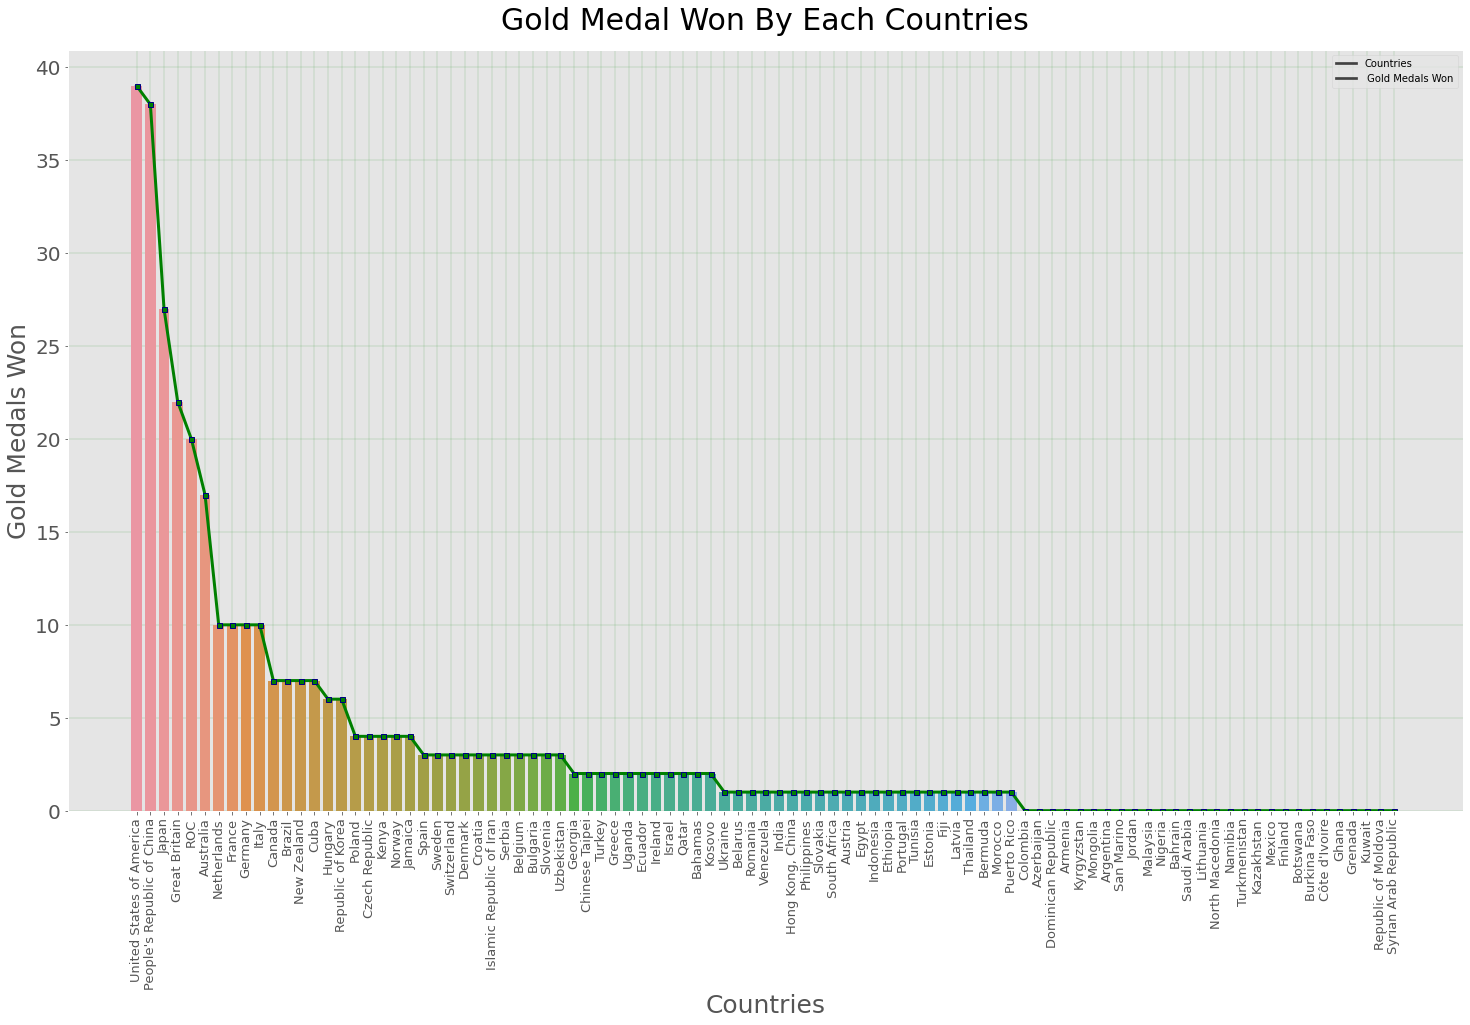

In [17]:
plt.figure(figsize=(25,14))
sns.barplot(x='Country',y='Gold Medal',data=to)
plt.plot(to.Country,to["Gold Medal"],marker='s',c='g',ls='-',lw=3,ms=5,mew=1,mec='navy');
plt.tick_params(axis='x',which='major',labelsize=13,rotation=90)
plt.tick_params(axis='y',which='major',labelsize=20)
plt.title("Gold Medal Won By Each Countries",fontsize=30,pad=20)
plt.xlabel("Countries",fontsize=25)
plt.ylabel("Gold Medals Won",fontsize=25)
plt.legend(['Countries',' Gold Medals Won']);
plt.grid(color='g',linestyle='-',linewidth=0.3,alpha=0.5)

In [18]:
plt.style.use("ggplot")

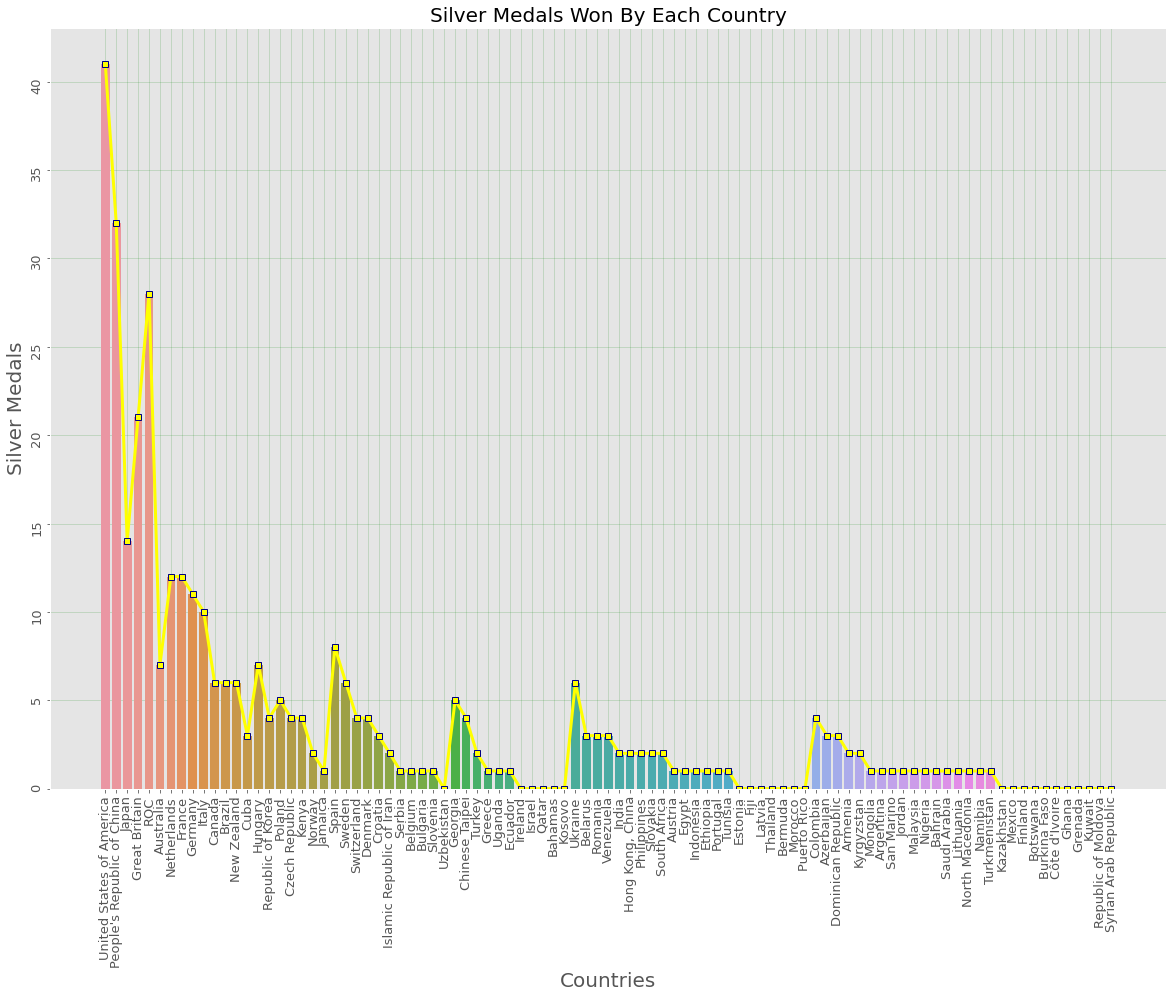

In [19]:
plt.figure(figsize=(20,14))
sns.barplot(x="Country", y="Silver Medal", data=to)
plt.plot(to.Country, to["Silver Medal"], marker="s", color="yellow", ls="-", linewidth=3, mew=1, mec="navy");
plt.tick_params(axis='x', which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13, rotation=90)
plt.title("Silver Medals Won By Each Country", fontsize=20)
plt.xlabel("Countries", fontsize=20)
plt.ylabel("Silver Medals", fontsize=20)
plt.grid(color="g", linestyle="-", linewidth=.5, alpha=.3)

In [20]:
plt.style.use("ggplot")

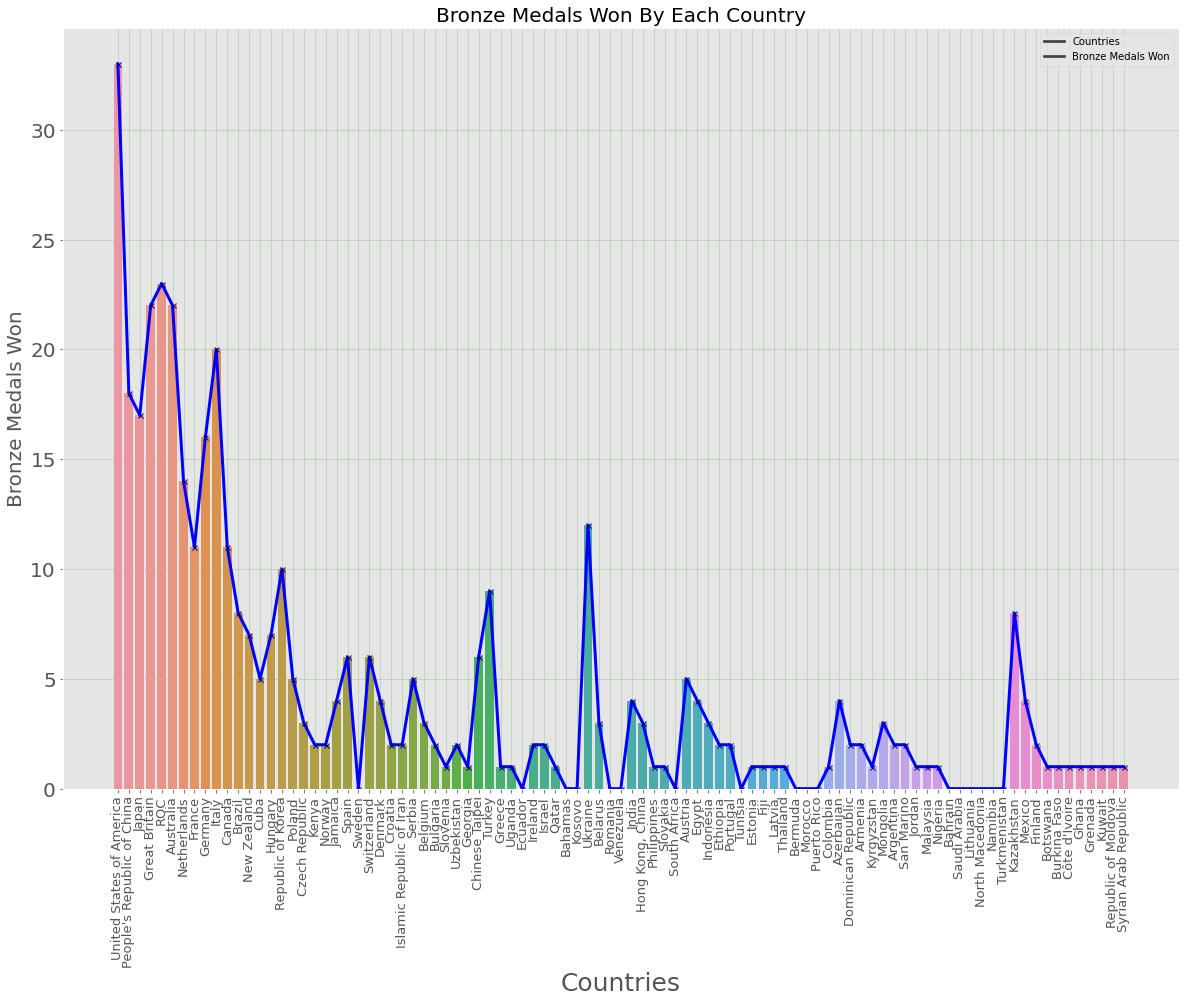

In [21]:
plt.figure(figsize=(20,14))
sns.barplot(x="Country", y="Bronze Medal", data = to)
plt.plot(to.Country, to["Bronze Medal"], marker='x', color="b", ls='-', lw=3, ms=5, mew=1, mec="navy");
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=20)
plt.title("Bronze Medals Won By Each Country", fontsize=20)
plt.xlabel("Countries", fontsize=25)
plt.ylabel("Bronze Medals Won", fontsize=20)
plt.legend(["Countries","Bronze Medals Won"])
plt.grid(color="g", linestyle="-", linewidth=.5, alpha=.3)

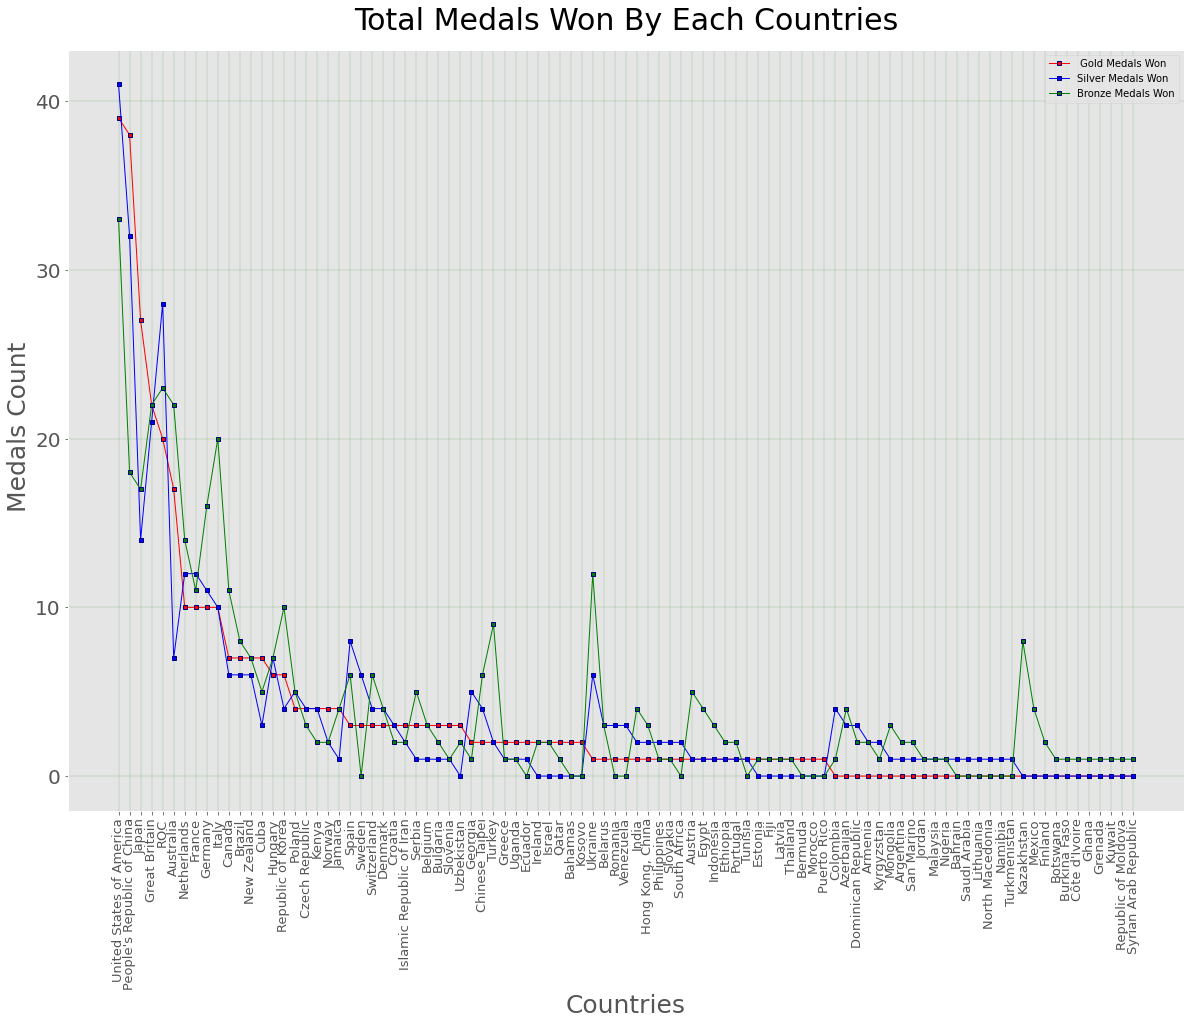

In [22]:
plt.figure(figsize=(20,14))
plt.plot(to.Country,to["Gold Medal"],marker='s',c='r',ls='-',lw=1,ms=4,mew=1,mec='navy');
plt.plot(to.Country,to["Silver Medal"],marker='s',c='b',ls='-',lw=1,ms=4,mew=1,mec='navy');
plt.plot(to.Country,to["Bronze Medal"],marker='s',c='g',ls='-',lw=1,ms=4,mew=1,mec='navy');
plt.tick_params(axis='x',which='major',labelsize=13,rotation=90)
plt.tick_params(axis='y',which='major',labelsize=20)
plt.title("Total Medals Won By Each Countries",fontsize=30,pad=20)
plt.xlabel("Countries",fontsize=25)
plt.ylabel(" Medals Count",fontsize=25)
plt.legend([' Gold Medals Won','Silver Medals Won','Bronze Medals Won']);
plt.grid(color='g',linestyle='-',linewidth=0.3,alpha=0.5)

In [23]:
def wc(data, mask=None, title=""):
    text=" ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["Republic"])
    wordcloud = WordCloud(stopwords=stopwords, mask=mask, max_font_size=50, max_words=500, background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis("off")
    fig.suptitle(title, fontsize=20)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

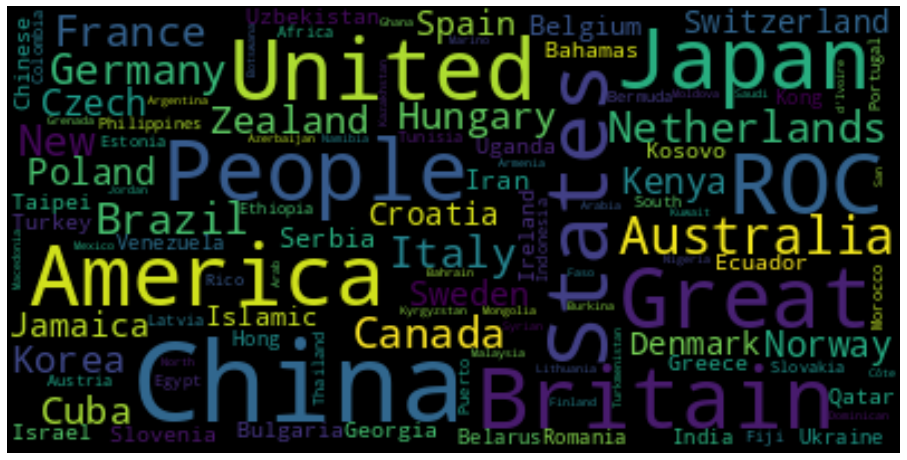

In [24]:
wc(to.Country)

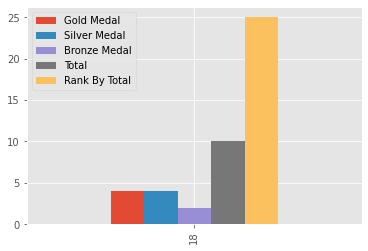

In [25]:
kenya=to.query('Country=="Kenya"').plot(kind="bar")